In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
plt.style.use('fivethirtyeight')

path = 'data/jhu_wifi/WigleWifi_20150911210322.csv'

In [2]:
df = pd.read_csv(path, encoding = "ISO-8859-1")
df.head()

,MAC,SSID,AuthMode,FirstSeen,Channel,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type
0,00:c0:ca:85:06:23,wyman,[WPA2-PSK-CCMP][ESS],2015-09-11 20:30:35,6,-78,39.326259,-76.62385,22,8,WIFI
1,6c:b0:ce:f2:06:e8,NETGEAR15,[WPA2-PSK-CCMP][WPS][ESS],2015-09-11 20:30:35,1,-87,39.326259,-76.62385,22,8,WIFI
2,8e:04:ff:74:4e:17,xfinitywifi,[ESS],2015-09-11 20:30:35,6,-90,39.326259,-76.62385,22,8,WIFI
3,f4:4e:05:98:62:a2,eduroam,[WPA2-EAP-CCMP][ESS],2015-09-11 20:30:35,1,-81,39.326259,-76.62385,22,8,WIFI
4,8e:04:ff:74:4e:16,NaN,[WPA2-PSK-CCMP][ESS],2015-09-11 20:30:35,6,-84,39.326259,-76.62385,22,8,WIFI


Now we have the data loaded nicely into a Pandas dataframe and we can look at some of the basics of the data.

In [3]:
display('Number of rows: {}'.format(len(df)))
display('Unique SSIDs: {}'.format(len(df['SSID'].unique())))
display('Unique MACs: {}'.format(len(df['MAC'].unique())))
display('Number of Auth Mode types: {}'.format(len(df['AuthMode'].unique())))

'Number of rows: 2358'

'Unique SSIDs: 511'

'Unique MACs: 1527'

'Number of Auth Mode types: 31'

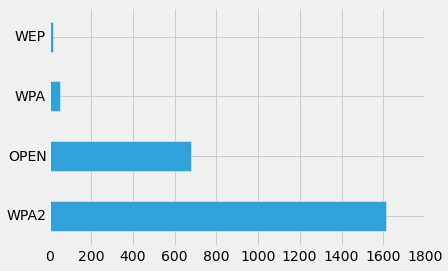

In [4]:
def auth_filter(x):
    if 'WPA2' in x:
        return 'WPA2'
    elif 'WPA' in x:
        return 'WPA'
    elif 'WEP' in x:
        return 'WEP'
    else:
        return 'OPEN'

df['AuthMode'].apply(auth_filter).value_counts().plot(kind='barh')

So there are a significant number of open networks, but the overall majority use WPA2. That's good for the University but not so great for attackers. Of course, there could be a way around that via WPS. How many networks use that?

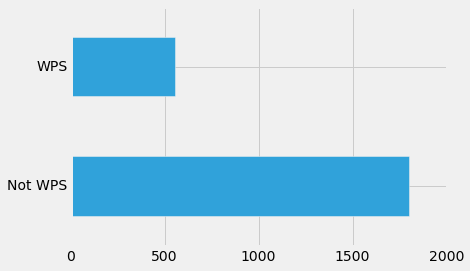

In [5]:
def wps(x):
    if 'WPS' in x:
        return 'WPS'
    else:
        return 'Not WPS'
df['AuthMode'].apply(wps).value_counts().plot(kind='barh')

Over 500 networks use WPS! Using a tool like Reaver an attacker could easily breach those networks.

This is just some basic insights into the data. We could look further into the different forms of WPA/WPA2 authentication, but for an attacker these insights are enough. Using the above function for extracting WPS networks, an attacker could determine the locations of those networks and mount an attack on each of them.

In [6]:
s = df['AuthMode'].apply(wps)
wps_entries = df.ix[s[s == 'WPS'].index]
wps_entries.head()

,MAC,SSID,AuthMode,FirstSeen,Channel,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type
1,6c:b0:ce:f2:06:e8,NETGEAR15,[WPA2-PSK-CCMP][WPS][ESS],2015-09-11 20:30:35,1,-87,39.326259,-76.623850,22,8,WIFI
5,8c:04:ff:74:4e:15,HOME-4E15,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],2015-09-11 20:30:35,6,-90,39.326259,-76.623850,22,8,WIFI
21,00:22:6b:5d:8e:b3,ttbar,[WPA-PSK-TKIP][WPS][ESS],2015-09-11 20:32:19,11,-90,39.330436,-76.623186,22,7,WIFI
30,e8:de:27:80:7a:ba,TP-LINK_807ABA,[WPA2-PSK-CCMP][WPS][ESS],2015-09-11 20:32:47,6,-93,39.330757,-76.621889,27,10,WIFI
31,a0:63:91:cc:44:ee,CC-WiFi,[WPA2-PSK-CCMP][WPS][ESS],2015-09-11 20:32:47,9,-93,39.330757,-76.621889,27,10,WIFI
